In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# TASK 1

In [ ]:
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\COURSE_9_NIIT\\DS1_C9_S2_Practice_BikeSales_Data.csv")

In [ ]:
df.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950


In [ ]:
selected_col=["Revenue","Order_Quantity","Unit_Cost","Unit_Price","Customer_Age"]

In [ ]:
df_selected=df[selected_col]
df_selectedm=pd.DataFrame(df_selected)
df_selectedm

,Revenue,Order_Quantity,Unit_Cost,Unit_Price,Customer_Age
0,950,8.0,45,120.0,19
1,950,8.0,45,120.0,19
2,594,5.0,45,120.0,29
3,832,7.0,45,120.0,29
4,238,2.0,45,120.0,29
...,...,...,...,...,...
495,64,13.0,2,5.0,37
496,153,31.0,2,5.0,37
497,54,11.0,2,5.0,37
498,25,5.0,2,5.0,37


In [ ]:
df_selectedm.describe()

,Revenue,Order_Quantity,Unit_Cost,Unit_Price,Customer_Age
count,500.000000,495.000000,500.000000,497.000000,500.000000
mean,343.216000,13.375758,16.548000,43.601610,36.588000
std,556.346929,9.249150,21.759473,58.344484,11.363649
min,5.000000,1.000000,2.000000,5.000000,17.000000
25%,69.000000,5.000000,2.000000,5.000000,31.000000
50%,129.000000,12.000000,3.000000,9.000000,35.000000
75%,272.000000,22.000000,45.000000,120.000000,42.000000
max,3564.000000,32.000000,59.000000,159.000000,73.000000


# TASK 2

In [ ]:
df_selectedm.isnull().sum()

Revenue           0
Order_Quantity    5
Unit_Cost         0
Unit_Price        3
Customer_Age      0
dtype: int64

In [ ]:
df_selectedm.dtypes

Revenue             int64
Order_Quantity    float64
Unit_Cost           int64
Unit_Price        float64
Customer_Age        int64
dtype: object

In [ ]:
ordermean=df_selectedm["Order_Quantity"].mean()

In [ ]:
unitprice_mean=df_selectedm["Unit_Price"].mean()

In [ ]:
df_selectedm.loc[:,"Order_Quantity"]=df_selectedm["Order_Quantity"].fillna(ordermean)

In [ ]:
df_selectedm.loc[:,"Unit_Price"]=df_selectedm["Unit_Price"].fillna(unitprice_mean)

In [ ]:
df_selectedm.isnull().sum()

Revenue           0
Order_Quantity    0
Unit_Cost         0
Unit_Price        0
Customer_Age      0
dtype: int64

In [ ]:
def handle_outlier(selected_out):
    mycols=selected_out.columns
    print(mycols)
    for col in mycols:
        Q1=selected_out[col].quantile(0.25)
        Q3=selected_out[col].quantile(0.75)
        IQR=Q3-Q1
        LF=Q1-(1.5*IQR)
        UF=Q3+(1.5*IQR)
        print("lower fence:",LF,"in column:",col)
        print("upper fence:",UF,"in column:",col)
        mymedian=selected_out[col].median()
        print("Median value is:",mymedian,"in col:",col)
        df_selectedm.loc[df_selectedm[col]<LF,col]=mymedian
        df_selectedm.loc[df_selectedm[col]<LF,col]=mymedian
    return selected_out
handle_outlier(df_selectedm)

Index(['Revenue', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Customer_Age'], dtype='object')
lower fence: -235.5 in column: Revenue
upper fence: 576.5 in column: Revenue
Median value is: 129.0 in col: Revenue
lower fence: -20.5 in column: Order_Quantity
upper fence: 47.5 in column: Order_Quantity
Median value is: 12.0 in col: Order_Quantity
lower fence: -62.5 in column: Unit_Cost
upper fence: 109.5 in column: Unit_Cost
Median value is: 3.0 in col: Unit_Cost
lower fence: -167.5 in column: Unit_Price
upper fence: 292.5 in column: Unit_Price
Median value is: 9.0 in col: Unit_Price
lower fence: 14.5 in column: Customer_Age
upper fence: 58.5 in column: Customer_Age
Median value is: 35.0 in col: Customer_Age


,Revenue,Order_Quantity,Unit_Cost,Unit_Price,Customer_Age
0,950,8.0,45,120.0,19
1,950,8.0,45,120.0,19
2,594,5.0,45,120.0,29
3,832,7.0,45,120.0,29
4,238,2.0,45,120.0,29
...,...,...,...,...,...
495,64,13.0,2,5.0,37
496,153,31.0,2,5.0,37
497,54,11.0,2,5.0,37
498,25,5.0,2,5.0,37


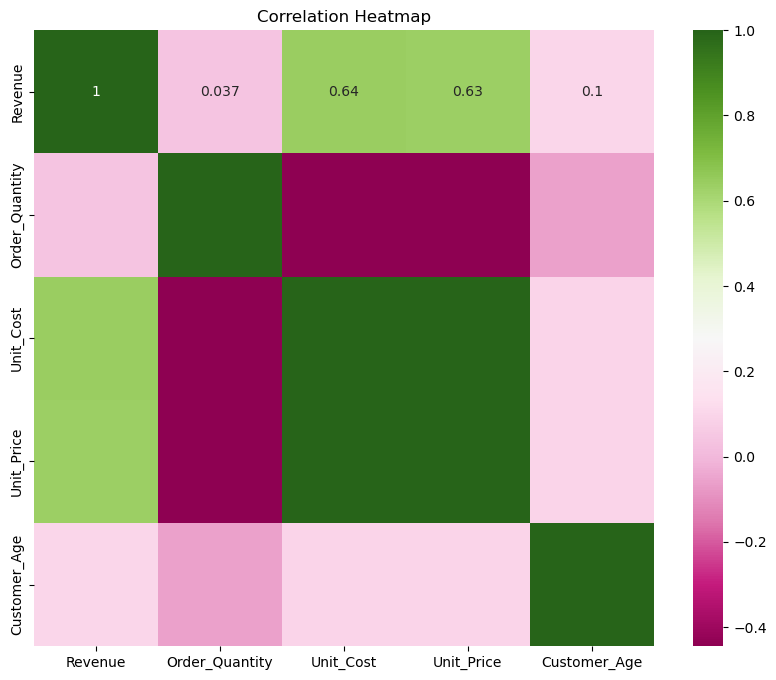

In [ ]:
correlation=df_selectedm.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_selected.corr(), annot=True, cmap="PiYG")
plt.title("Correlation Heatmap")
plt.show()

# so here i am selecting feature with the higest correlatin with revenue as unit cost column

# TASK 3

In [ ]:
x=df_selectedm["Unit_Cost"]
y=df_selectedm["Revenue"]

In [ ]:
x.shape

(500,)

In [ ]:
y.shape

(500,)

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaled_x=pd.DataFrame(scaler.fit_transform(x.to_numpy().reshape(-1,1)))

In [ ]:
scaled_y=pd.DataFrame(scaler.fit_transform(y.to_numpy().reshape(-1,1)))

# spliting

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,scaled_y,train_size=0.7,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 1)
(150, 1)
(350, 1)
(150, 1)


# ML STEPS

In [ ]:
# IMPORT THE MODULE
from sklearn.linear_model import LinearRegression

In [ ]:
# STEP 2 CREATE OBJECT
li_reg=LinearRegression()

In [ ]:
# step3: train or fit the model
lin_reg_model=li_reg.fit(x_train.to_numpy().reshape(-1,1),y_train.to_numpy().reshape(-1,1))

In [ ]:
# step4: test the model
print(lin_reg_model.score(x_train.to_numpy().reshape(-1,1),y_train.to_numpy().reshape(-1,1)))

0.4282232386283017


In [ ]:
# step5:evaluate the performance
y_pred=lin_reg_model.predict(x_test.to_numpy().reshape(-1,1))

In [ ]:
# step6: evaluate testing peformance
print(lin_reg_model.score(y_test.to_numpy().reshape(-1,1),y_pred))

0.2218601472451136


In [ ]:
my_slope=lin_reg_model.coef_
my_slope[0,0]

0.2366241363910518

In [ ]:
my_intercept=lin_reg_model.intercept_
my_intercept[0]

0.026571681049091724

# TASK 4

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
mse=mean_squared_error(y_test,y_pred)# average sum of all squared error
print("MSE=",mse)

MSE= 0.022817010826447815


In [ ]:
mae=(mean_absolute_error(y_test,y_pred)) # average sum of all absolute error
print("MAE=",mae)

MAE= 0.06829619344405405


In [ ]:
r_squared= r2_score(y_test,y_pred)
print("R2=",r_squared) # checks relaiabality of the model

R2= 0.36413667544433326


In [ ]:
df_results=pd.DataFrame()
df_results

""


In [ ]:
y_test.reset_index(inplace=True)

In [ ]:
df_results["predictions"]=pd.DataFrame(y_pred)
df_results["actuals"]=y_test.loc[:,0]
df_results["residuals"]=abs(df_results["predictions"])-abs(df_results["actuals"])
df_results

,predictions,actuals,residuals
0,0.026572,0.016578,0.009994
1,0.205078,0.165496,0.039582
2,0.026572,0.005620,0.020952
3,0.034874,0.054229,-0.019354
4,0.263196,0.042709,0.220487
...,...,...,...
145,0.026572,0.039056,-0.012484
146,0.205078,0.032031,0.173046
147,0.026572,0.008429,0.018142
148,0.026572,0.015173,0.011399


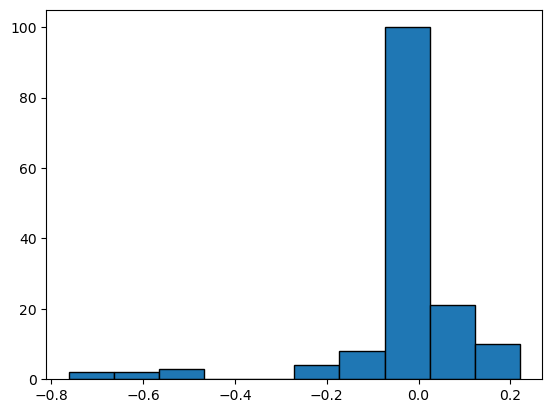

In [ ]:
plt.hist(df_results["residuals"],edgecolor="black")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


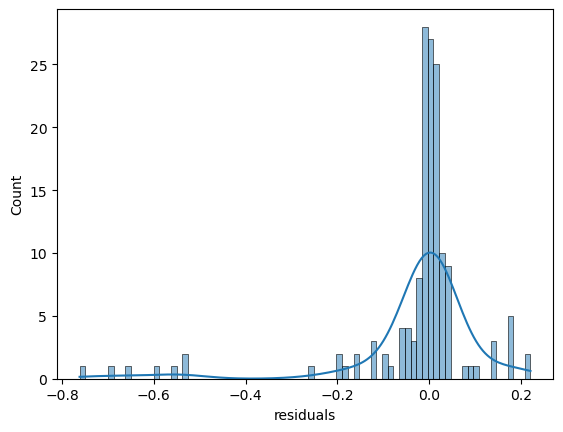

In [ ]:
sns.histplot(df_results["residuals"],kde=True)
plt.show()

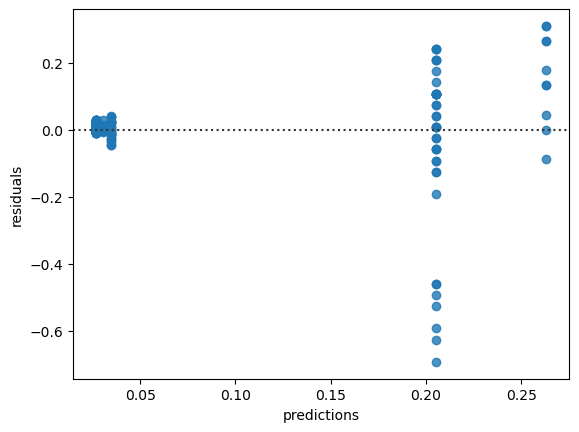

In [ ]:
sns.residplot(data=df_results,x=df_results["predictions"],y=df_results["residuals"])
plt.show()

# conclusion:
# model is not reliable
# cannot use this model
# we need to improve the model